In [ ]:
# 기본 옵션
options(warn = -1)
options(repr.plot.width=15, repr.plot.height=9)
options(scipen = 100)
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8")

# library 불러오기
library(stringr)
library(plotrix)
library(dplyr)

In [130]:
basic <- function(parameters) {
   parameters[1:6, ]
   str(parameters)
   summary(parameters)
   parameters[(nrow(parameters)-5) : nrow(parameters), ]
}

In [ ]:
election <- read.csv("Data/election_2022.csv")

In [ ]:
# electionSum = 이재명 + 윤석열 + 심상정
election$electionSum <- election$이재명 + election$윤석열 + election$심상정
election$electionSum <- apply(election[5:7],1,sum)

# electionSum에 투표수 몇 percent?
election$electionRatio <- election$electionSum / election$투표수 * 100

# electionRatio가 가장 높은 시군구와 가장 낮은 시군구?
# 1) arrange
arrange(election,desc(electionRatio))[c(1,nrow(election)),c(1:2,ncol(election))]
# 2) subset
subset(election,electionRatio == max(election$electionRatio) | electionRatio == min(election$electionRatio))

# CSV로 저장
write.csv(election,"Data/election_2022_job.csv",row.names = F)

## 광역시도별 투표율 3D PieChart로 표현

In [ ]:
# 전체 투표 수 중 광역시도의 비중(투표율)
# 투표율 <- 광역시도별 투표수 / 투표수의 합계
# 이 투표율로 차트를 만든다.
# Pie Chart는 정렬를 하여 보여주어야 한다.

# 투표수의 합계
sum(election$투표수)
# 광역시도별 투표수의 합계
arrange(aggregate(투표수 ~ 광역시도,election,sum),desc(투표수))
# 투표율
round(arrange(aggregate(투표수 ~ 광역시도,election,sum),desc(투표수))$투표수 / sum(election$투표수) * 100,2)
# 투표율에 관한 새로운 dataframe
election_rate <- arrange(aggregate(투표수 ~ 광역시도,election,sum),desc(투표수))
election_rate$투표비율 <- round(arrange(aggregate(투표수 ~ 광역시도,election,sum),desc(투표수))$투표수 / sum(election$투표수) * 100,2)

par(family = 'AppleGothic',bg = 'lightgrey')
label <- paste(election_rate$광역시도,"\n",election_rate$투표비율,"%")
pie3D(
    election_rate$투표비율,
    main = '광역시도별 투표율',
    labels = label,
    labelcex = 0.9,
    radius = 0.9 # chart의 반지름 설정
)

In [ ]:
# 수도권(경기,서울,인천)의 투표수에 대한 전체 투표수의 비중?
sum(election_rate[c(1,2,5),]$투표비율)

## 윤석열 후보의 광역시도별 득표율을 3D Pie Chart로 표현

In [ ]:
# 광역시도별 윤석열 투표수의 합계
election_yoon <- arrange(aggregate(윤석열 ~ 광역시도,election,sum),desc(윤석열))

# 광역시도별 윤석열 투표수의 합계
sum(election$윤석열)

# 광역시도별 윤석열 투표수의 합계 / 광역시도별 투표수의 합계 = 득표율
election_yoon$득표율 <- round(arrange(aggregate(윤석열 ~ 광역시도,election,sum),desc(윤석열))$윤석열 / sum(election$윤석열) * 100,1)

# 득표율을 표로 만든다.
par(family = 'AppleGothic',bg = 'lightgrey')

pie3D(
    election_yoon$득표율,
    main = '윤석열 후보의 광역시도별 득표율',
    labels = paste(election_yoon$광역시도,"\n",ifelse(election_yoon$득표율 < 3,'',paste(election_yoon$득표율,'%'))),
    labelcex = 0.9
)

## 이재명 후보의 광역시도별 득표율

In [ ]:
# 광역시도별 이재명 투표수의 합계
election_이재명 <- arrange(aggregate(이재명 ~ 광역시도,election,sum),desc(이재명))
# 이재명 투표수의 전체 합계
sum(election_이재명[,2])
# 광역시도별 이재명 투표수의 합계 / 이재명 투표수의 전체 합계
round(election_이재명[,2] / sum(election_이재명[,2]) * 100,2)
# 차트
par(family = 'AppleGothic',bg = 'lightgrey')
pie3D(
    main = '이재명 후보의 광역시도별 득표율',
    round(election_이재명[,2] / sum(election_이재명[,2]) * 100,2),
    labels = paste(election_이재명[,1],'\n',round(election_이재명[,2] / sum(election_이재명[,2]) * 100,2),'%'),
    labelcex = 0.9
)

## 윤석열 후보의 서울 득표 Top5만 득표율로 표시하고 나머지 지역은 기타로 합치기

In [ ]:
# 서울특별시 데이터만 발췌
# subset(election,광역시도=='서울특별시')
election_seoul <- election[election$광역시도 == '서울특별시',]

# 서울특별시 데이터 중 필요한 컬럼만 발췌
election_seoul_윤석열 <- arrange(election_seoul, desc(윤석열))[,c(2,6)]
election_seoul_윤석열_ratio <- round(c(election_seoul_윤석열[1:5,2],sum(election_seoul_윤석열[-5:-1,2])) / sum(election_seoul_윤석열$윤석열) * 100,2)

In [ ]:
# Label
label1 <- paste(c(election_seoul_윤석열$시군구[1:5], '기타'),"\n",election_seoul_윤석열_ratio,"%")

In [ ]:
par(family = "Applegothic", bg = 'lightgrey')
pie3D(
    election_seoul_윤석열_ratio,
    labels = label1,
    explode = 0.08,
    radius = 0.9
)
title(
    main = c('\n윤석열 후보의 서울 득표율','\n\nTOP 5'),
    cex.main = 3,
    col.main = c('black')
)

## 대선주자 출생지별 득표율 분석
- 윤석열 후보의 출생지는 서울특별시 성북구

In [ ]:
newElection_seoul_ <- election_seoul[election_seoul$시군구 == '성북구',][,5:7]
newElection_seoul_$기타 <- (election_seoul[election_seoul$시군구 == '성북구',]$투표수 - election_seoul[election_seoul$시군구 == '성북구',]$electionSum)

par(family = 'applegothic',bg = 'white')
label_1 <- colnames(newElection_seoul_)
pie3D(
    as.numeric(round(newElection_seoul_ / election_seoul[election_seoul$시군구 == '성북구',]$투표수 * 100,2)),
    main = '서울시 성북구의 후보별 득표율',
    labels = label_1,
    col = c('Blue','Red','Yellow','white'),
)

----

In [ ]:
# 서울특별시 성북구만 발췌
pob_윤석열 <- subset(election,시군구 == '성북구')

# Ratio 구하기
pob_윤석열_ratio <- as.numeric(c(pob_윤석열[,5:7], pob_윤석열[,4] - sum(pob_윤석열[,5:7]))) / pob_윤석열[,4] * 100

# label 만들기
pob_윤석열_label <- paste(c("이재명","윤석열","심상정","기타"),'\n',round(pob_윤석열_ratio,2),'%')

# pie chart
par(family = 'applegothic',bg = 'white')
pie3D(
    pob_윤석열_ratio,
    labels = pob_윤석열_label,
    col = c('Blue','Red','Yellow','white'),    
)

In [ ]:
election_성북구 <- subset(election,시군구 == '성북구')
round(as.numeric(c(election_성북구[5:7], election_성북구$투표수 - election_성북구$electionSum)) / election_성북구$투표수 * 100,2)

pie3D(
    as.numeric(c(election_성북구[5:7],election_성북구$투표수 - election_성북구$electionSum)),
    labels = paste(
             c(colnames(election_성북구[1,5:7]),'기타'),
             '\n',
             round(as.numeric(c(election_성북구[5:7], election_성북구$투표수 - election_성북구$electionSum)) / election_성북구$투표수 * 100, 2),
             '%'),
    col = c('skyblue','red','yellow','white'),
    labelcex = 2.0,
)

title(
    main = '\n\n서울특별시 성북구 투표',
    cex.main = 2.3
)

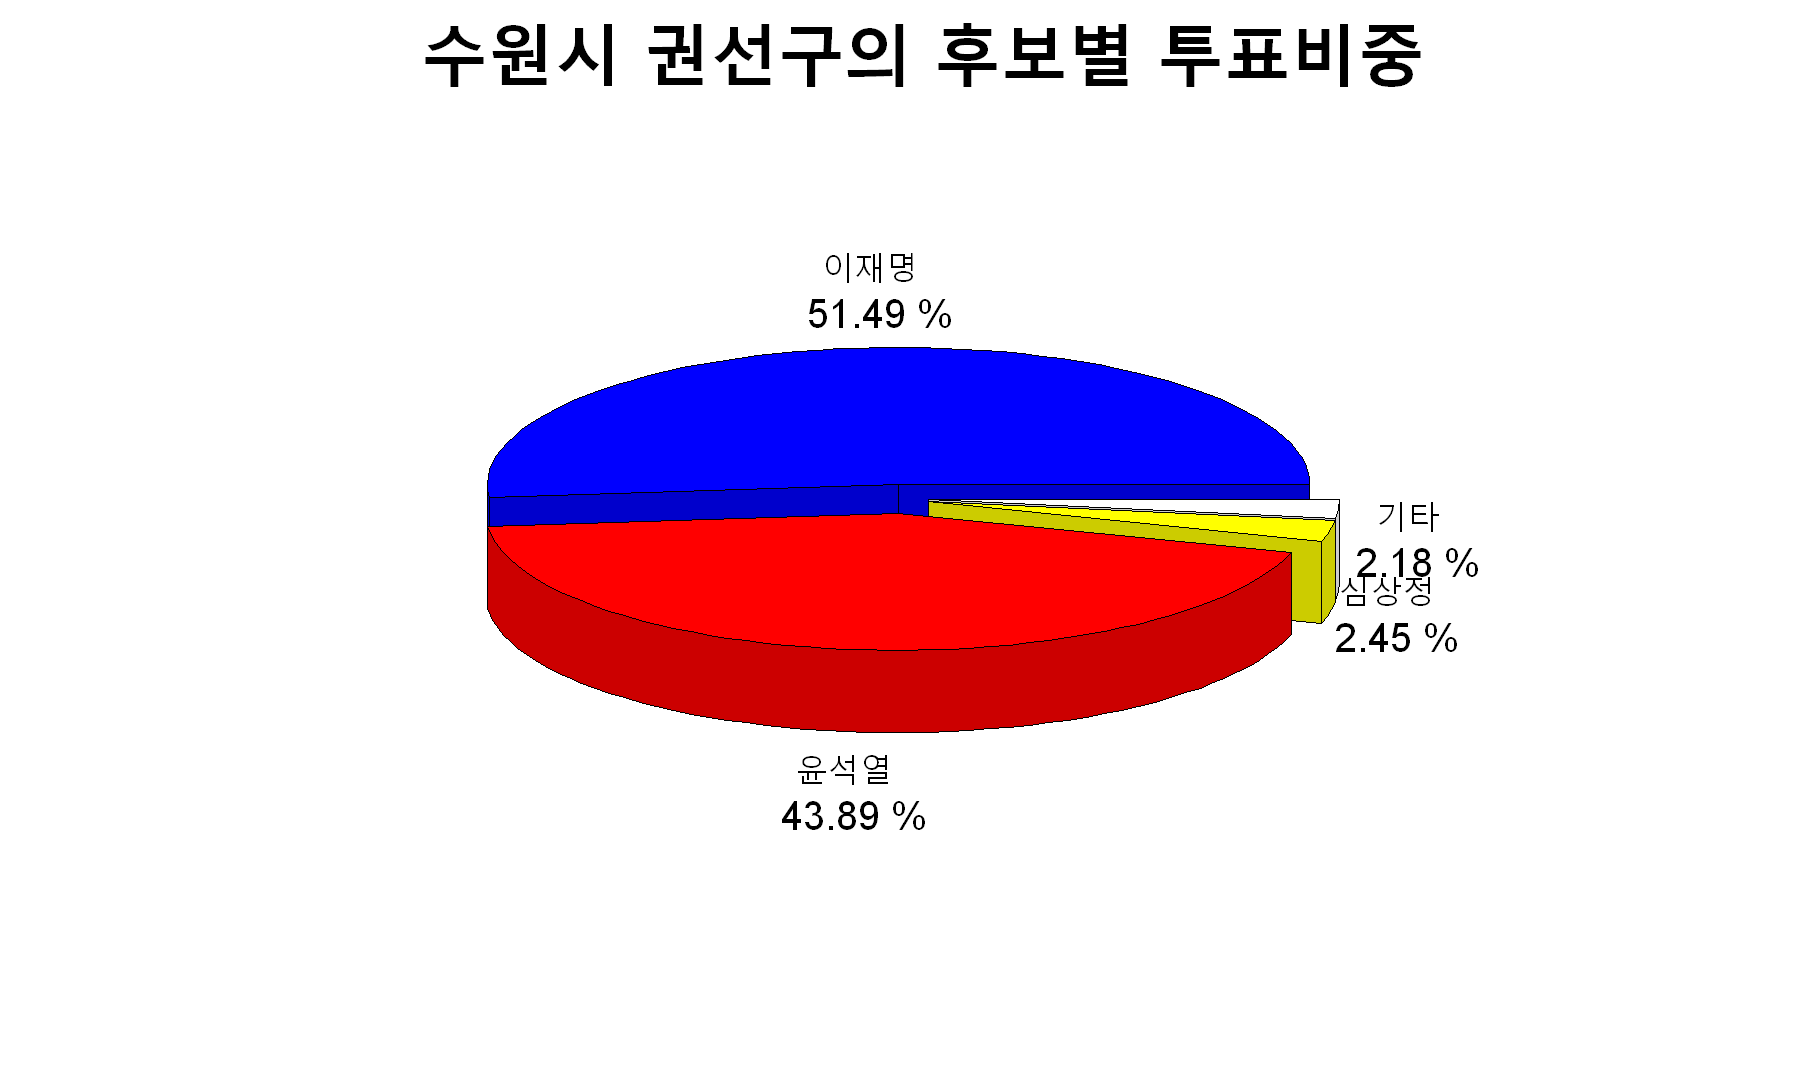

In [232]:
election_수원 <- election[grep(pattern = '수원',election$`시군구`), ]
pie3D(
    as.numeric(c(election_수원[2,5:7],election_수원[2,4] - election_수원[2,8])) / election_수원[2,4] * 100,
    labels = paste(
        c(colnames(election_수원[5:7]),'기타'),'\n',
        round(as.numeric(c(election_수원[2,5:7],election_수원[2,4] - election_수원[2,8])) / election_수원[2,4] * 100,2),'%'
        ),
    labelcex = 2,
    col = c('BLUE','red','yellow','white'),
    explode = 0.07
)

title(
    main = '수원시 권선구의 후보별 투표비중',
    cex.main = 4
)